In [250]:
import graphlab

In [251]:
graphlab.canvas.set_target('browser')

# SFrame

In [252]:
people_dataset = graphlab.SFrame('people-example.csv')

Finished parsing file /root/anaconda2/envs/gl-env-new/notebooks/people-example.csv

Parsing completed. Parsed 7 lines in 0.037639 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /root/anaconda2/envs/gl-env-new/notebooks/people-example.csv

Parsing completed. Parsed 7 lines in 0.015985 secs.

In [253]:
people_dataset.head()

First Name,Last Name,Country,age
Bob,Smith,United States,24
Alice,Williams,Canada,23
Malcolm,Jone,England,22
Felix,Brown,USA,23
Alex,Cooper,Poland,23
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [254]:
people_dataset.tail(2)

First Name,Last Name,Country,age
Tod,Campbell,United States,22
Derek,Ward,Switzerland,25


In [255]:
people_dataset['First Name']

dtype: str
Rows: 7
['Bob', 'Alice', 'Malcolm', 'Felix', 'Alex', 'Tod', 'Derek']

In [256]:
people_dataset['First Name'][1]

'Alice'

In [257]:
print people_dataset['age'].mean()
print people_dataset['age'].max()
print people_dataset['age'].min()

23.1428571429
25
22


In [258]:
people_dataset['Full Name'] = people_dataset['First Name'] + ' ' + people_dataset['Last Name']

In [259]:
people_dataset.head(3)

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone


In [260]:
update_function = lambda x: 'United States' if x == 'USA' else x
people_dataset['Country'] = people_dataset['Country'].apply(update_function)
people_dataset.head()

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,24,Bob Smith
Alice,Williams,Canada,23,Alice Williams
Malcolm,Jone,England,22,Malcolm Jone
Felix,Brown,United States,23,Felix Brown
Alex,Cooper,Poland,23,Alex Cooper
Tod,Campbell,United States,22,Tod Campbell
Derek,Ward,Switzerland,25,Derek Ward


In [261]:
people_dataset['age'] += 2
people_dataset.head()

First Name,Last Name,Country,age,Full Name
Bob,Smith,United States,26,Bob Smith
Alice,Williams,Canada,25,Alice Williams
Malcolm,Jone,England,24,Malcolm Jone
Felix,Brown,United States,25,Felix Brown
Alex,Cooper,Poland,25,Alex Cooper
Tod,Campbell,United States,24,Tod Campbell
Derek,Ward,Switzerland,27,Derek Ward


In [262]:
people_dataset['First Name'].show(view='Categorical')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [263]:
people_dataset.show()

Canvas is updated and available in a tab in the default browser.


In [264]:
print people_dataset['age'].std()

0.989743318611


In [1]:
people_dataset.show(view='BoxWhisker Plot', x='First Name',
                   y='age')
# The numerical value should be on the y axis

NameError: name 'people_dataset' is not defined

# Regression

## Step 1: Representing data through an SFrame

In [266]:
house_dataset = graphlab.SFrame('home_data.gl/')

In [267]:
house_dataset.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [268]:
house_dataset.show(view='Scatter Plot', x='sqft_living',
                  y='price')

Canvas is updated and available in a tab in the default browser.


In [269]:
house_dataset.show(view='BoxWhisker Plot', x='zipcode',
                  y='price')

Canvas is updated and available in a tab in the default browser.


In [270]:
print house_dataset['price'].mean()

540088.141905


## Step 2: Splitting the dataset into training data and test data

In [271]:
house_training_data, house_test_data = house_dataset.random_split(.8, seed=0)

## Step 3 (a): Creating our machine learning model and training it using the training data

In [272]:
sqft_model = graphlab.linear_regression.create(house_training_data,
                                              target='price',
                                              features=['sqft_living'],
                                              validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.017924     | 4349521.926170     | 262943.613754 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

## Step 4 (a): Evaluating the model on our test data (RMSE = sqrt(RSS/N)

In [273]:
sqft_model.evaluate(house_test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}

# matplotlib

In [274]:
from matplotlib import pyplot as plt
%matplotlib inline

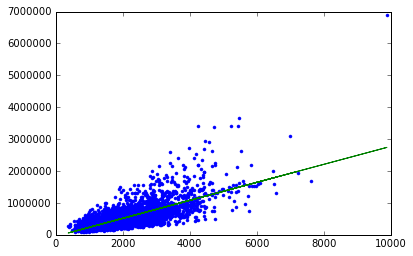

In [275]:
plt.plot(house_test_data['sqft_living'],
        house_test_data['price'], '.',
        house_test_data['sqft_living'],
        sqft_model.predict(house_test_data), '-')

In [276]:
sqft_model.show()

Canvas is updated and available in a tab in the default browser.


In [277]:
sqft_model['coefficients']

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


In [278]:
sqft_model['coefficients']['value'][1]

281.9578501659882

In [279]:
house1 = house_dataset[house_dataset['id'] == '0114101516']
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  19901   |  1.5   |     0      |  0   |     4     |   7   |    1430    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1927   |      0       |  98028  | 47.75584254 | -122.22874498 |     1780.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [280]:
sqft_model.predict(house1)

dtype: float
Rows: 1
[356085.7050671459]

In [281]:
house1['price']

dtype: int
Rows: 1
[310000]

In [282]:
sqft_model.get('coefficients')

name,index,value,stderr
(intercept),None,-47114.0206702,4923.34437753
sqft_living,None,281.957850166,2.16405465323


In [283]:
sqft_model.get('coefficients')['value'][1]

281.9578501659882

## Step 3 (b): Creating our machine learning model and training it using the training data

In [284]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [285]:
my_features_model = graphlab.linear_regression.create(house_training_data,
                                                     target='price',
                                                     features=my_features,
                                                     validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.058796     | 3763208.270523     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

## Step 4 (b): Evaluating the model on our test data (RMSE = sqrt(RSS/N)

In [286]:
my_features_model.evaluate(house_test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}

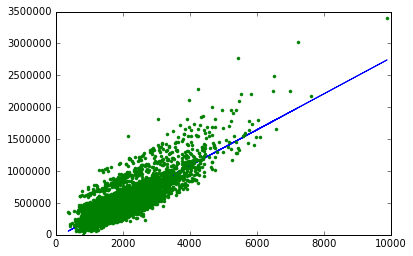

In [287]:
plt.plot(house_test_data['sqft_living'],
        sqft_model.predict(house_test_data), '-',
        house_test_data['sqft_living'],
        my_features_model.predict(house_test_data), '.')

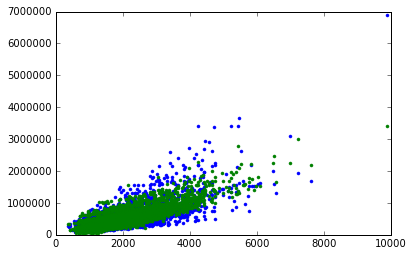

In [288]:
plt.plot(house_test_data['sqft_living'],
        house_test_data['price'], '.',
        house_test_data['sqft_living'],
        my_features_model.predict(house_test_data), '.')

In [289]:
my_features_model.show()

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [290]:
house_dataset[my_features].show()

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [291]:
house_dataset[my_features]

bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode
3,1,1180,5650,1,98178
3,2.25,2570,7242,2,98125
2,1,770,10000,1,98028
4,3,1960,5000,1,98136
3,2,1680,8080,1,98074
4,4.5,5420,101930,1,98053
3,2.25,1715,6819,2,98003
3,1.5,1060,9711,1,98198
3,1,1780,7470,1,98146
3,2.5,1890,6560,2,98038


In [292]:
sqft_model.evaluate(house_test_data)

{'max_error': 4143550.8825285938, 'rmse': 255191.02870527358}

In [293]:
my_features_model.evaluate(house_test_data)

{'max_error': 3486584.509381705, 'rmse': 179542.4333126903}

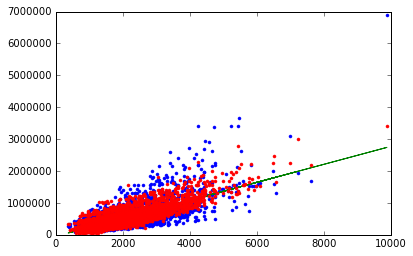

In [294]:
plt.plot(house_test_data['sqft_living'],
        house_test_data['price'], '.',
        house_test_data['sqft_living'],
        sqft_model.predict(house_test_data), '-',
        house_test_data['sqft_living'],
        my_features_model.predict(house_test_data), '.')

In [295]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 1

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 0114101516 | 2014-05-28 00:00:00+00:00 | 310000 |    3     |     1     |     1430    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  19901   |  1.5   |     0      |  0   |     4     |   7   |    1430    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1927   |      0       |  98028  | 47.75584254 | -122.22874498 |     1780.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[1 rows x 21 columns]

In [296]:
print house_dataset[house_dataset['id'] == '0114101516']['price']
print house1['price'][0]

[310000, ... ]
310000


In [297]:
print sqft_model.predict(house1)[0]

356085.705067


In [298]:
print my_features_model.predict(house1)[0]

351066.537071


In [299]:
house2 = house_dataset[house_dataset['price'] == 7700000]
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+
|     id     |            date           |  price  | bedrooms | bathrooms |
+------------+---------------------------+---------+----------+-----------+
| 6762700020 | 2014-10-13 00:00:00+00:00 | 7700000 |    6     |     8     |
+------------+---------------------------+---------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    12050    |  27600   |  2.5   |     0      |  3   |     4     |   13  |    8570    |
+-------------+----------+--------+------------+------+-----------+-------+------------+
+---------------+----------+--------------+---------+-------------+
| sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+---------------+----------+--------------+---------+-------------+
|      3480     |   1910   |     1987     |  98102  | 47.62977314 |
+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.32270069 |     3940.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

In [300]:
print house2['price'][0]
print sqft_model.predict(house2)[0]
print my_features_model.predict(house2)[0]

7700000
3350478.07383
5114939.46182


## Step 3 (c): Creating our machine learning model and training it using the training data

In [301]:
full_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat',
                 'long', 'sqft_living15', 'sqft_lot15']
full_features_model = graphlab.linear_regression.create(house_training_data,
                                                       target='price',
                                                       features=full_features,
                                                       validation_set=None)

Linear regression:

In [302]:
full_features_model.evaluate(house_test_data)

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.076735     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

{'max_error': 3556849.4138582097, 'rmse': 156831.11680219014}

In [303]:
print sqft_model.evaluate(house_test_data)['max_error']
print my_features_model.evaluate(house_test_data)['max_error']
print full_features_model.evaluate(house_test_data)['max_error']

4143550.88253
3486584.50938
3556849.41386


In [304]:
print sqft_model.evaluate(house_test_data)['rmse']
print my_features_model.evaluate(house_test_data)['rmse']
print full_features_model.evaluate(house_test_data)['rmse']

255191.028705
179542.433313
156831.116802


In [305]:
print house1['price'][0]
print sqft_model.predict(house1)[0]
print my_features_model.predict(house1)[0]
print full_features_model.predict(house1)[0]

310000
356085.705067
351066.537071
382970.330205


In [306]:
print house2['price'][0]
print sqft_model.predict(house2)[0]
print my_features_model.predict(house2)[0]
print full_features_model.predict(house2)[0]

7700000
3350478.07383
5114939.46182
5217393.11377


In [307]:
full_features_model.show()

Canvas is updated and available in a tab in the default browser.


In [308]:
full_features_model['coefficients']

name,index,value,stderr
(intercept),None,-3160274.04132,6640947.33717
bedrooms,2,4819.28115445,4170.21280234
bedrooms,4,-20437.4393442,3091.13808948
bedrooms,5,-39902.3822816,5338.25127501
bedrooms,1,27125.272173,13205.0296493
bedrooms,6,-88041.2081174,11232.9342999
bedrooms,7,-238107.546438,28896.6217507
bedrooms,8,-147384.613197,48255.6362876
bedrooms,0,39059.8952791,59641.0730487
bedrooms,9,-227130.809967,70682.1770303


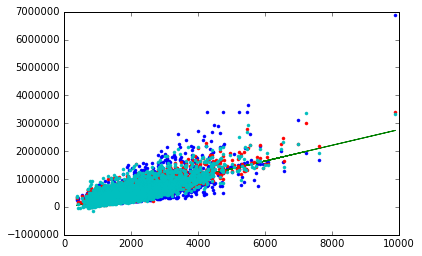

In [309]:
plt.plot(house_test_data['sqft_living'],
        house_test_data['price'], '.',
        house_test_data['sqft_living'],
        sqft_model.predict(house_test_data), '-',
        house_test_data['sqft_living'],
        my_features_model.predict(house_test_data), '.',
        house_test_data['sqft_living'],
        full_features_model.predict(house_test_data), '.')

In [310]:
alansary_house = {'bedrooms':[8], 
                  'bathrooms':[25], 
                  'sqft_living':[50000], 
                  'sqft_lot':[225000],
                  'floors':[4], 
                  'zipcode':['98039'], 
                  'condition':[10], 
                  'grade':[10],
                  'waterfront':[1],
                  'view':[4],
                  'sqft_above':[37500],
                  'sqft_basement':[12500],
                  'yr_built':[1994],
                  'yr_renovated':[2010],
                  'lat':[47.627606],
                  'long':[-122.242054],
                  'sqft_living15':[5000],
                  'sqft_lot15':[40000]}

In [311]:
alansary_house_SFrame = graphlab.SFrame(alansary_house)

In [312]:
alansary_house_SFrame

Columns:
	bathrooms	int
	bedrooms	int
	condition	int
	floors	int
	grade	int
	lat	float
	long	float
	sqft_above	int
	sqft_basement	int
	sqft_living	int
	sqft_living15	int
	sqft_lot	int
	sqft_lot15	int
	view	int
	waterfront	int
	yr_built	int
	yr_renovated	int
	zipcode	str

Rows: 1

Data:
+-----------+----------+-----------+--------+-------+-----------+-------------+
| bathrooms | bedrooms | condition | floors | grade |    lat    |     long    |
+-----------+----------+-----------+--------+-------+-----------+-------------+
|     25    |    8     |     10    |   4    |   10  | 47.627606 | -122.242054 |
+-----------+----------+-----------+--------+-------+-----------+-------------+
+------------+---------------+-------------+---------------+----------+------------+
| sqft_above | sqft_basement | sqft_living | sqft_living15 | sqft_lot | sqft_lot15 |
+------------+---------------+-------------+---------------+----------+------------+
|   37500    |     12500     |    50000    |      5000     |  225000  |   40000    |
+------------+---------------+-------------+---------------+----------+------------+
+------+------------+----------+--------------+---------+
| view | waterfront | yr_built | yr_renovated | zipcode |
+------+------------+----------+--------------+---------+
|  4   |     1      |   1994   |     2010     |  98039  |
+------+------------+----------+--------------+---------+
[1 rows x 18 columns]

In [313]:
print sqft_model.predict(alansary_house_SFrame)[0]
print my_features_model.predict(alansary_house_SFrame)[0]
print full_features_model.predict(alansary_house_SFrame)[0]

14050778.4876
13749825.5257
10625018.283


# Regression Quiz

## Discovere which neighborhood (zip code) of Seattle had the highest average house sale price, take the sales data, select only the houses with this zip code, and compute the average price.

In [314]:
house_dataset.show(view='BoxWhisker Plot',
                  x='zipcode',
                  y='price')

Canvas is updated and available in a tab in the default browser.


In [315]:
highest_average_sale_price_zipcode = '98039'
highest_average_sale_price = house_dataset[house_dataset['zipcode'] == highest_average_sale_price_zipcode]
highest_average_sale_price.head(2)
highest_average_sale_price['price'].mean()

2160606.5999999996

## Select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft. What fraction of the all houses have ‘sqft_living’ in this range?

In [316]:
selected_houses = house_dataset[(house_dataset['sqft_living'] > 2000) & (house_dataset['sqft_living'] <= 4000)]
selected_houses.head(2)

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 2

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 6414100192 | 2014-12-09 00:00:00+00:00 | 538000 |    3     |    2.25   |     2570    |
| 1736800520 | 2015-04-03 00:00:00+00:00 | 662500 |    3     |    2.5    |     3560    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|   9796   |   1    |     0      |  0   |     3     |   8   |    1860    |      1700     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1965   |      0       |  98007  | 47.60065993 | -122.14529566 |     2210.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[2 rows x 21 columns]

In [317]:
selected_houses.show()

Canvas is updated and available in a tab in the default browser.


In [318]:
house_dataset.show()

Canvas is updated and available in a tab in the default browser.


In [319]:
fraction = 9071 / 21509.0
print fraction

0.421730438421


## Build a regression model with several more features:
## advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
## Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.
## What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [320]:
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', 'condition', 'grade', 'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
advanced_features_model = graphlab.linear_regression.create(house_training_data,
                                                           target='price',
                                                           features=advanced_features,
                                                           validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.071616     | 3469012.450686     | 154580.940736 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [321]:
print advanced_features_model.evaluate(house_test_data)['rmse']
print my_features_model.evaluate(house_test_data)['rmse']

156831.116802
179542.433313


In [322]:
difference = 179542.433313 - 156831.116802
print difference

22711.316511


# Classification

# Step 1: importing the data into SFrame

In [323]:
amazon_dataset = graphlab.SFrame('amazon_baby.gl/')

In [324]:
amazon_dataset.show()

Canvas is updated and available in a tab in the default browser.


In [325]:
amazon_dataset.head(2)

name,review,rating
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0


In [326]:
amazon_dataset['name'].show(view='Categorical')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [327]:
amazon_dataset.tail(2)

name,review,rating
"Baby Food Freezer Tray -Bacteria Resistant, BPA ...",I am extremely happy withthis product. I have ...,5.0
Best 2 Pack Baby CarShade for Kids - Window ...,I love this product verymush . I have bought ...,5.0


# Step 2: Build the word count vector for each review

In [328]:
amazon_dataset['word_count'] = graphlab.text_analytics.count_words(amazon_dataset['review'])

In [329]:
amazon_dataset.head(2)

name,review,rating,word_count
Planetwise Flannel Wipes,"These flannel wipes areOK, but in my opinion ...",3.0,"{'and': 5, '6': 1,'stink': 1, 'because' ..."
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ..."


### Explore Vulli Sophie

In [330]:
giraffe_reviews = amazon_dataset[amazon_dataset['name'] == 'Vulli Sophie the Giraffe Teether']

In [331]:
giraffe_reviews.head(2)

name,review,rating,word_count
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ..."
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ..."


## Step 3: Build a sentiment classifier

In [332]:
amazon_dataset['rating'].show(view='Categorical')

Canvas is updated and available in a tab in the default browser.


### Data Engineering
* Define what's a positive and a negative sentiment

In [333]:
#ignore all 3* reviews
amazon_dataset = amazon_dataset[amazon_dataset['rating'] != 3]

In [334]:
#positive sentiment = 4* or 5* reviews
amazon_dataset['sentiment'] = amazon_dataset['rating'] >= 4
amazon_dataset.head(2)

name,review,rating,word_count,sentiment
Planetwise Wipe Pouch,it came early and was notdisappointed. i love ...,5.0,"{'and': 3, 'love': 1,'it': 2, 'highly': 1, ...",1
Annas Dream Full Quiltwith 2 Shams ...,Very soft and comfortableand warmer than it ...,5.0,"{'and': 2, 'quilt': 1,'it': 1, 'comfortable': ...",1


## Step 4: Splitting the dataset into training data and test data

In [335]:
amazon_training_data, amazon_test_data = amazon_dataset.random_split(.8, seed=0)

## Step 5: Training the sentiment classifier

In [336]:
sentiment_model = graphlab.logistic_classifier.create(amazon_training_data,
                                                     target='sentiment',
                                                     features=['word_count'],
                                                     validation_set=amazon_test_data)

WARNING: The number of feature dimensions in this problem is very large in comparison with the number of examples. Unless an appropriate regularization value is set, this model may not provide accurate predictions for a validation/test set.

##### As you can see for this particular dataset if the maximum number of iterations (max_iterations) is 10 which is the default, it will result a solution that is not optimal and with a maximum number of iterations greater than 12 it will be terminated due to numerical difficulties.
##### This model may not be ideal. To improve it, consider doing one of the following:
* (a) Increasing the regularization.
* (b) Standardizing the input data.
* (c) Removing highly correlated features.
* (d) Removing `inf` and `NaN` values in the training data.

## Step 6: Evaluate the sentiment model

In [337]:
sentiment_model.evaluate(amazon_test_data, metric='roc_curve')
#roc_curve metric is a way to represent false positives and
#false negatives (the confusion matrix)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 219217

Number of coefficients    : 219218

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 1         | 5        | 0.000002  | 6.080170     | 0.841481          | 0.839989            |

| 2         | 9        | 3.000000  | 15.556919    | 0.947425          | 0.894877            |

| 3         | 10       | 3.000000  | 16.885757    | 0.923768          | 0.866232            |

| 4         | 11       | 3.000000  | 17.781298    | 0.971779          | 0.912743            |

| 5         | 12       | 3.000000  | 18.692667    | 0.975511          | 0.908900            |

| 6         | 13       | 3.000000  | 19.537185    | 0.899991          | 0.825967            |

| 7         | 15       | 1.000000  | 20.820340    | 0.984548          | 0.921451            |

| 8         | 16       | 1.000000  | 21.674337    | 0.985118          | 0.921871            |

| 9         | 17       | 1.000000  | 22.519311    | 0.987066          | 0.919709            |

| 10        | 18       | 1.000000  | 23.361769    | 0.988715          | 0.916256            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+----------------+----------------+-------+------+
 | threshold |      fpr       |      tpr       |   p   |  n   |
 +-----------+----------------+----------------+-------+------+
 |    0.0    |      1.0       |      1.0       | 27976 | 5328 |
 |   1e-05   | 0.909346846847 | 0.998856162425 | 27976 | 5328 |
 |   2e-05   | 0.896021021021 | 0.998748927652 | 27976 | 5328 |
 |   3e-05   | 0.886448948949 | 0.998462968259 | 27976 | 5328 |
 |   4e-05   | 0.879692192192 | 0.998284243637 | 27976 | 5328 |
 |   5e-05   | 0.875187687688 | 0.998212753789 | 27976 | 5328 |
 |   6e-05   | 0.872184684685 | 0.998177008865 | 27976 | 5328 |
 |   7e-05   | 0.868618618619 | 0.998034029168 | 27976 | 5328 |
 |   8e-05   | 0.864677177177 | 0.997998284244 | 27976 | 5328 |
 |   9e-05   | 0.860735735736 | 0.997962539319 | 27976 | 5328 |
 +-----------+----------------+----------------+-------+------

In [338]:
sentiment_model.show(view='Evaluation')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


### Applying the learnded model to understand sentiment for  Giraffe

In [339]:
giraffe_reviews['predicted_sentiment'] = sentiment_model.predict(giraffe_reviews, output_type='probability')

In [340]:
giraffe_reviews.head()

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,He likes chewing on allthe parts especially the ...,5.0,"{'and': 1, 'all': 1,'because': 1, 'it': 1, ...",0.999513023521
Vulli Sophie the GiraffeTeether ...,My son loves this toy andfits great in the diaper ...,5.0,"{'and': 1, 'right': 1,'help': 1, 'just': 1, ...",0.999320678306
Vulli Sophie the GiraffeTeether ...,There really should be alarge warning on the ...,1.0,"{'and': 2, 'all': 1,'would': 1, 'latex.': 1, ...",0.013558811687
Vulli Sophie the GiraffeTeether ...,All the moms in my moms'group got Sophie for ...,5.0,"{'and': 2, 'one!': 1,'all': 1, 'love': 1, ...",0.995769474148
Vulli Sophie the GiraffeTeether ...,I was a little skepticalon whether Sophie was ...,5.0,"{'and': 3, 'all': 1,'months': 1, 'old': 1, ...",0.662374415673
Vulli Sophie the GiraffeTeether ...,I have been reading aboutSophie and was going ...,5.0,"{'and': 6, 'seven': 1,'already': 1, 'love': 1, ...",0.999997148186
Vulli Sophie the GiraffeTeether ...,My neice loves her sophieand has spent hours ...,5.0,"{'and': 4, 'drooling,':1, 'love': 1, ...",0.989190989536
Vulli Sophie the GiraffeTeether ...,What a friendly face!And those mesmerizing ...,5.0,"{'and': 3, 'chew': 1,'be': 1, 'is': 1, ...",0.999563518413
Vulli Sophie the GiraffeTeether ...,We got this just for myson to chew on instea ...,5.0,"{'chew': 2, 'seemed': 1,'because': 1, 'about.': ...",0.970160542725
Vulli Sophie the GiraffeTeether ...,"My baby seems to likethis toy, but I could ...",3.0,"{'and': 2, 'already': 1,'some': 1, 'it': 3, ...",0.195367644588


### Sort the reviews based on the predicted sentiment and explore
* The stars are really skewed.

In [341]:
giraffe_reviews = giraffe_reviews.sort('predicted_sentiment', ascending=False)

In [342]:
giraffe_reviews.head(2)

name,review,rating,word_count,predicted_sentiment
Vulli Sophie the GiraffeTeether ...,"Sophie, oh Sophie, yourtime has come. My ...",5.0,"{'giggles': 1, 'all': 1,""violet's"": 2, 'bring': ...",1.0
Vulli Sophie the GiraffeTeether ...,I'm not sure why Sophieis such a hit with the ...,4.0,"{'adoring': 1, 'find': 1,'month': 1, 'bright': 1, ...",0.999999999703


In [343]:
giraffe_reviews['review'][0]

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [344]:
giraffe_reviews[0]['review']

"Sophie, oh Sophie, your time has come. My granddaughter, Violet is 5 months old and starting to teeth. What joy little Sophie brings to Violet. Sophie is made of a very pliable rubber that is sturdy but not tough. It is quite easy for Violet to twist Sophie into unheard of positions to get Sophie into her mouth. The little nose and hooves fit perfectly into small mouths, and the drooling has purpose. The paint on Sophie is food quality.Sophie was born in 1961 in France. The maker had wondered why there was nothing available for babies and made Sophie from the finest rubber, phthalate-free on St Sophie's Day, thus the name was born. Since that time millions of Sophie's populate the world. She is soft and for babies little hands easy to grasp. Violet especially loves the bumpy head and horns of Sophie. Sophie has a long neck that easy to grasp and twist. She has lovely, sizable spots that attract Violet's attention. Sophie has happy little squeaks that bring squeals of delight from Viol

In [345]:
giraffe_reviews['review'][-1]

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

In [346]:
giraffe_reviews[-1]['review']

"My son (now 2.5) LOVED his Sophie, and I bought one for every baby shower I've gone to. Now, my daughter (6 months) just today nearly choked on it and I will never give it to her again. Had I not been within hearing range it could have been fatal. The strange sound she was making caught my attention and when I went to her and found the front curved leg shoved well down her throat and her face a purply/blue I panicked. I pulled it out and she vomited all over the carpet before screaming her head off. I can't believe how my opinion of this toy has changed from a must-have to a must-not-use. Please don't disregard any of the choking hazard comments, they are not over exaggerated!"

# Quiz

# Question 1:

## In the IPython notebook above, we used the word counts for all words in the reviews to train the sentiment classifier model. Now, we are going to follow a similar path, but only use this subset of the words:
* selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']

* Often, ML practitioners will throw out words they consider “unimportant” before training their model. This procedure can often be helpful in terms of accuracy. Here, we are going to throw out all words except for the very few above. Using so few words in our model will hurt our accuracy, but help us interpret what our classifier is doing. 


* 1. Use .apply() to build a new feature with the counts for each of the selected_words: In the notebook above, we created a column ‘word_count’ with the word counts for each review. Our first task is to create a new column in the products SFrame with the counts for each selected_word above, and, in the process, we will see how the method .apply() can be used to create new columns in our data (our features) and how to use a Python function, which is an extremely useful concept to grasp! 

* Our first goal is to create a column products[‘awesome’] where each row contains the number of times the word ‘awesome’ showed up in the review for the corresponding product, and 0 if the review didn’t show up. One way to do this is to look at the each row ‘word_count’ column and follow this logic:

    * If ‘awesome’ shows up in the word counts for a particular product (row of the products SFrame), then we know how often ‘awesome’ appeared in the review, 

    * if ‘awesome’ doesn’t appear in the word counts, then it didn’t appear in the review, and we should set the count for ‘awesome’ to 0 in this review. 

* We could use a for loop to iterate this logic for each row of the products SFrame, but this approach would be really slow, because the SFrame is not optimized for this being accessed with a for loop. Instead, we will use the .apply() method to iterate the the logic above for each row of the products[‘word_count’] column (which, since it’s a single column, has type SArray). Read about using the .apply() method on an SArray here.
https://turi.com/products/create/docs/generated/graphlab.SArray.apply.html

* We are now ready to create our new columns:
    * First, you will use a Python function to define the logic above. You will write a function called awesome_count which takes in the word counts and returns the number of times ‘awesome’ appears in the reviews.
        * A few tips:
            * i. Each entry of the ‘word_count’ column is of Python type dictionary.
            * ii. If you have a dictionary called dict, you can access a field in the dictionary using:
                * dict['awesome']
                * 	but only if ‘awesome’ is one of the fields in the dictionary, otherwise you will get a nasty error.
            * iii. In Python, to test if a dictionary has a particular field, you can simply write:
                * if 'awesome' in dict
                * In our case, if this condition doesn’t hold, the count of ‘awesome’ should be 0.
                * Using these tips, you can now write the awesome_count function.
    * Next, you will use .apply() to iterate awesome_count for each row of products[‘word_count’] and create a new column called ‘awesome’ with the resulting counts. Here is what that looks like:
        * products['awesome'] = products['word_count'].apply(awesome_count)
    * And you are done! Check the products SFrame and you should see the new column you just create.
    * Repeat this process for the other 11 words in selected_words. (Here, we described a simple procedure to obtain the counts for each selected_word. There are other more efficient ways of doing this, and we encourage you to explore this further.)

## Using the .sum() method on each of the new columns you created, answer the following questions: Out of the selected_words, which one is most used in the dataset? Which one is least used? Save these results to answer the quiz at the end.

# Solution 1:
## 1. Out of the 11 words in selected_words, which one is most used in the reviews in the dataset? great
## 2. Out of the 11 words in selected_words, which one is least used in the reviews in the dataset? wow

In [347]:
selected_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
for x in selected_words:
    func = lambda d: d[x] if x in d else 0
    amazon_dataset[x] = amazon_dataset['word_count'].apply(func)
amazon_dataset.head(2)

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	awesome	int
	great	int
	fantastic	int
	amazing	int
	love	int
	horrible	int
	bad	int
	terrible	int
	awful	int
	wow	int
	hate	int

Rows: 2

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------+-------+-----------+---------+
|           word_count          | sentiment | awesome | great | fantastic | amazing |
+-------------------------------+-----------+---------+-------+-----------+---------+
| {'and': 3, 'love': 1, 'it'... |     1     |    0    |   0   |     0     |    0    |
| {'and': 2, 'quilt': 1, 'it... |     1     |    0    |   0   |     0     |    0    |
+-------------------------------+-----------+---------+-------+-----------+---------+
+------+----------+-----+----------+-------+-----+------+
| love | horrible | bad | terrible | awful | wow | hate |
+------+----------+-----+----------+-------+-----+------+
|  1   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
+------+----------+-----+----------+-------+-----+------+
[2 rows x 16 columns]

In [348]:
summation = {}
for x in selected_words:
    summation[x] = amazon_dataset[x].sum()
print summation

{'fantastic': 873, 'love': 40277, 'bad': 3197, 'awesome': 2002, 'great': 42420, 'terrible': 673, 'amazing': 1305, 'horrible': 659, 'awful': 345, 'hate': 1057, 'wow': 131}


In [349]:
ordered_list = []
for k, v in summation.items():
    ordered_list.append((v, k))
ordered_list.sort(reverse=True)
print ordered_list[0], ordered_list[-1]

(42420, 'great') (131, 'wow')


# Question 2:

## 2. Create a new sentiment analysis model using only the selected_words as features: In the IPython Notebook above, we used word counts for all words as features for our sentiment classifier. Now, you are just going to use the selected_words:
* Use the same train/test split as in the IPython Notebook from lecture:
* Train a logistic regression classifier (use graphlab.logistic_classifier.create) using just the selected_words. Hint: you can use this parameter in the .create() call to specify the features used to be exactly the new columns you just created:
* Call your new model: selected_words_model.
    * You will now examine the weights the learned classifier assigned to each of the 11 words in selected_words and gain intuition as to what the ML algorithm did for your data using these features. In GraphLab Create, a learned model, such as the selected_words_model, has a field 'coefficients', which lets you look at the learned coefficients. You can access it by using:
        * selected_words_model['coefficients']
    * The result has a column called ‘value’, which contains the weight learned for each feature.

## Using this approach, sort the learned coefficients according to the ‘value’ column using .sort(). Out of the 11 words in selected_words, which one got the most positive weight? Which one got the most negative weight? Do these values make sense for you? Save these results to answer the quiz at the end. 

# Solution 2:
## 3. Out of the 11 words in selected_words, which one got the most positive weight in the selected_words_model? love
## 4. Out of the 11 words in selected_words, which one got the most negative weight in the selected_words_model? terrible

In [350]:
amazon_dataset.head(2)

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	awesome	int
	great	int
	fantastic	int
	amazing	int
	love	int
	horrible	int
	bad	int
	terrible	int
	awful	int
	wow	int
	hate	int

Rows: 2

Data:
+-------------------------------+-------------------------------+--------+
|              name             |             review            | rating |
+-------------------------------+-------------------------------+--------+
|     Planetwise Wipe Pouch     | it came early and was not ... |  5.0   |
| Annas Dream Full Quilt wit... | Very soft and comfortable ... |  5.0   |
+-------------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------+-------+-----------+---------+
|           word_count          | sentiment | awesome | great | fantastic | amazing |
+-------------------------------+-----------+---------+-------+-----------+---------+
| {'and': 3, 'love': 1, 'it'... |     1     |    0    |   0   |     0     |    0    |
| {'and': 2, 'quilt': 1, 'it... |     1     |    0    |   0   |     0     |    0    |
+-------------------------------+-----------+---------+-------+-----------+---------+
+------+----------+-----+----------+-------+-----+------+
| love | horrible | bad | terrible | awful | wow | hate |
+------+----------+-----+----------+-------+-----+------+
|  1   |    0     |  0  |    0     |   0   |  0  |  0   |
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |
+------+----------+-----+----------+-------+-----+------+
[2 rows x 16 columns]

In [351]:
amazon_training_data_selected, amazon_test_data_selected = amazon_dataset.random_split(.8, seed=0)
amazon_selected_words_model = graphlab.logistic_classifier.create(amazon_training_data_selected,
                                                          target='sentiment',
                                                          features=selected_words,
                                                          validation_set=amazon_test_data_selected)

Logistic regression:

--------------------------------------------------------

Number of examples          : 133448

Number of classes           : 2

Number of feature columns   : 11

Number of unpacked features : 11

Number of coefficients    : 12

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Elapsed Time | Training-accuracy | Validation-accuracy |

+-----------+----------+--------------+-------------------+---------------------+

| 1         | 2        | 0.252851     | 0.844299          | 0.842842            |

| 2         | 3        | 0.410517     | 0.844186          | 0.842842            |

| 3         | 4        | 0.578490     | 0.844276          | 0.843142            |

| 4         | 5        | 0.740490     | 0.844269          | 0.843142            |

| 5         | 6        | 0.902218     | 0.844269          | 0.843142            |

| 6         | 7        | 1.060771     | 0.844269          | 0.843142            |

+-----------+----------+--------------+-------------------+---------------------+

SUCCESS: Optimal solution found.

In [352]:
amazon_selected_words_model['coefficients'].sort('value', ascending=False).print_rows(num_rows=12)

+-------------+-------+-------+------------------+------------------+
|     name    | index | class |      value       |      stderr      |
+-------------+-------+-------+------------------+------------------+
|     love    |  None |   1   |  1.39989834302   | 0.0287147460124  |
| (intercept) |  None |   1   |  1.36728315229   | 0.00861805467824 |
|   awesome   |  None |   1   |  1.05800888878   |  0.110865296265  |
|   amazing   |  None |   1   |  0.892802422508  |  0.127989503231  |
|  fantastic  |  None |   1   |  0.891303090304  |  0.154532343591  |
|    great    |  None |   1   |  0.883937894898  | 0.0217379527921  |
|     wow     |  None |   1   | -0.0541450123333 |  0.275616449416  |
|     bad     |  None |   1   | -0.985827369929  | 0.0433603009142  |
|     hate    |  None |   1   |  -1.40916406276  | 0.0771983993506  |
|    awful    |  None |   1   |  -1.76469955631  |  0.134679803365  |
|   horrible  |  None |   1   |  -1.99651800559  | 0.0973584169028  |
|   terrible  |  Non

In [357]:
amazon_selected_words_model.evaluate(amazon_test_data_selected, metric='roc_curve')
amazon_selected_words_model.show(view='Evaluation')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


# Question 3:

## 3. Comparing the accuracy of different sentiment analysis model: Using the method
* .evaluate(test_data)
## What is the accuracy of the selected_words_model on the test_data? What was the accuracy of the sentiment_model that we learned using all the word counts in the IPython Notebook above from the lectures? What is the accuracy majority class classifier on this task? How do you compare the different learned models with the baseline approach where we are just predicting the majority class? Save these results to answer the quiz at the end. 
* Hint: we discussed the majority class classifier in lecture, which simply predicts that every data point is from the most common class. This is baseline is something we definitely want to beat with models we learn from data.
* Accuracy: the number of examples it classifies correctly.
* You simply measure the number of correct decisions your classifier makes, divide by the total number of test examples, and the result is the accuracy of your classifier.

In [353]:
amazon_selected_words_model.evaluate(amazon_test_data, metric='roc_curve')

{'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+-----+-----+-------+------+
 | threshold | fpr | tpr |   p   |  n   |
 +-----------+-----+-----+-------+------+
 |    0.0    | 1.0 | 1.0 | 27976 | 5328 |
 |   1e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   2e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   3e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   4e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   5e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   6e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   7e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   8e-05   | 1.0 | 1.0 | 27976 | 5328 |
 |   9e-05   | 1.0 | 1.0 | 27976 | 5328 |
 +-----------+-----+-----+-------+------+
 [100001 rows x 5 columns]
 Note: Only the head of the SFrame is printed.
 You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.}

In [358]:
amazon_selected_words_model.show(view='Evaluation')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [359]:
sentiment_model.show(view='Evaluation')

Canvas is accessible via web browser at the URL: http://localhost:44056/index.html
Opening Canvas in default web browser.


In [360]:
#Majority class is True Positive, moving the threshold
#in the sentiment model to make 0 False Negatives will give us
#accuracy .84

# Solution 3:
## 5. Which of the following ranges contains the accuracy of the selected_words_model on the test_data? 0.841 to 0.871
## 6. Which of the following ranges contains the accuracy of the sentiment_model in the IPython Notebook from lecture on the test_data? 0.901 to 0.931

## 7. Which of the following ranges contains the accuracy of the majority class classifier, which simply predicts the majority class on the test_data? !
* 0.811 to 0.843 (Selected)
* 0.843 to 0.871
* 0.871 to 0.901
* 0.901 to 0.931

## 8. How do you compare the different learned models with the baseline approach where we are just predicting the majority class? !
* They all performed about the same.
* The model learned using all words performed much better than the one using the only the selected_words. And, the model learned using the selected_words performed much better than just predicting the majority class.
* The model learned using all words performed much better than the other two. The other two approaches performed about the same. (Selected)
* Predicting the simply majority class performed much better than the other two models.

## Hint: the majority class classifier simply predicts that every data point is from the most common class. This is baseline is something we definitely want to beat with models we learn from data

# Question 4:

## 4. Interpreting the difference in performance between the models: To understand why the model with all word counts performs better than the one with only the selected_words, we will now examine the reviews for a particular product.

   * We will investigate a product named ‘Baby Trend Diaper Champ’. (This is a trash can for soiled baby diapers, which keeps the smell contained.)
   * Just like we did for the reviews for the giraffe toy in the IPython Notebook in the lecture video, before we start our analysis you should select all reviews where the product name is ‘Baby Trend Diaper Champ’. Let’s call this table diaper_champ_reviews.
   * Again, just as in the video, use the sentiment_model to predict the sentiment of each review in diaper_champ_reviews and sort the results according to their ‘predicted_sentiment’.
   * What is the ‘predicted_sentiment’ for the most positive review for ‘Baby Trend Diaper Champ’ according to the sentiment_model from the IPython Notebook from lecture? Save this result to answer the quiz at the end.
   * Now use the selected_words_model you learned using just the selected_words to predict the sentiment most positive review you found above. Hint: if you sorted the diaper_champ_reviews in descending order (from most positive to most negative), this command will be helpful to make the prediction you need:
       * selected_words_model.predict(diaper_champ_reviews[0], output_type='probability')

## Why is the predicted_sentiment for the most positive review found using the model with all word counts (sentiment_model) much more positive than the one using only the selected_words (selected_words_model)? Hint: examine the text of this review, the extracted word counts for all words, and the word counts for each of the selected_words, and you will see what each model used to make its prediction.

In [361]:
diaper_champ_reviews = amazon_dataset[amazon_dataset['name'] == 'Baby Trend Diaper Champ']

In [362]:
diaper_champ_reviews['predicted_sentiment'] = sentiment_model.predict(diaper_champ_reviews, output_type='probability')

In [368]:
diaper_champ_reviews = diaper_champ_reviews.sort('predicted_sentiment', ascending=False)

In [371]:
diaper_champ_reviews.head(2)

Columns:
	name	str
	review	str
	rating	float
	word_count	dict
	sentiment	int
	awesome	int
	great	int
	fantastic	int
	amazing	int
	love	int
	horrible	int
	bad	int
	terrible	int
	awful	int
	wow	int
	hate	int
	predicted_sentiment	float

Rows: 2

Data:
+-------------------------+-------------------------------+--------+
|           name          |             review            | rating |
+-------------------------+-------------------------------+--------+
| Baby Trend Diaper Champ | Baby Luke can turn a clean... |  5.0   |
| Baby Trend Diaper Champ | I LOOOVE this diaper pail!... |  5.0   |
+-------------------------+-------------------------------+--------+
+-------------------------------+-----------+---------+-------+-----------+---------+
|           word_count          | sentiment | awesome | great | fantastic | amazing |
+-------------------------------+-----------+---------+-------+-----------+---------+
| {'all': 1, 'less': 1, "fri... |     1     |    0    |   0   |     0     |    0    |
| {'just': 1, 'over': 1, 'rw... |     1     |    0    |   0   |     0     |    0    |
+-------------------------------+-----------+---------+-------+-----------+---------+
+------+----------+-----+----------+-------+-----+------+---------------------+
| love | horrible | bad | terrible | awful | wow | hate | predicted_sentiment |
+------+----------+-----+----------+-------+-----+------+---------------------+
|  0   |    0     |  0  |    0     |   0   |  0  |  0   |    0.999999937267   |
|  1   |    0     |  0  |    0     |   0   |  0  |  0   |    0.999999917406   |
+------+----------+-----+----------+-------+-----+------+---------------------+
[2 rows x 17 columns]

In [370]:
diaper_champ_reviews['predicted_sentiment'][0]

0.9999999372669541

In [374]:
amazon_selected_words_model.predict(diaper_champ_reviews[0], output_type='probability')[0]

0.7969408512906712

In [382]:
for word in diaper_champ_reviews['review'][0].split(' '):
    if word in selected_words:
        print word